### Problem 6: Priors, Posteriors, Sensitivity, Specificity
Imagine you are a medical researcher analyzing the effectiveness of a new diagnostic test for a rare disease X. This disease affects 1% of the population. The probability of a true positive (the test correctly identifies an individual as having the disease) is 95%. This is also known as the sensitivity of the test.

The probability of a true negative (the test correctly identifies an individual as not
having the disease) is 90%. This is also known as the specificity of the test.
You run the test on a patient and it turns out positive. What is the probability that the patient has diseases X given the positive result? Formulate all relevant probabilistic quantities and provide the posterior probability of the test.

Next, we will consider a question of sensitivity analysis (not to be confused with the sensitivity of a test): How would the posterior probability change if the prior, the sensitivity, or the specificity of the test were to test. Write a Python program which produces three pretty and annotated 2D graphs depicting

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def posterior_probability(prior, sensitivity, specificity):
    false_positive_rate = 1 - specificity
    numerator = sensitivity * prior
    denominator = numerator + false_positive_rate * (1 - prior)
    return numerator / denominator

The posterior probability (Y-axis) of actually having the disease given a positive test as a
function of the prior probability (X-axis), assuming fixed sensitivity and specificity.

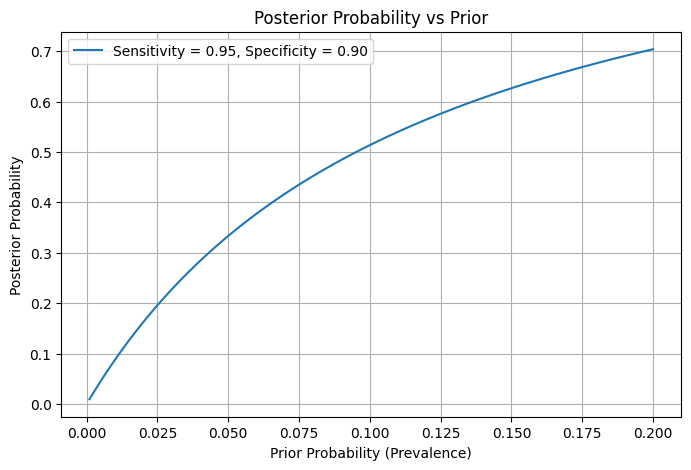

In [7]:
def plot_posterior_vs_prior():
    priors = np.linspace(0.001, 0.2, 100)
    posteriors = [posterior_probability(p, 0.95, 0.90) for p in priors]
    plt.figure(figsize=(8, 5))
    plt.plot(priors, posteriors, label='Sensitivity = 0.95, Specificity = 0.90')
    plt.xlabel('Prior Probability (Prevalence)')
    plt.ylabel('Posterior Probability')
    plt.title('Posterior Probability vs Prior')
    plt.legend()
    plt.grid()
    plt.show()

plot_posterior_vs_prior()

The posterior probability (Y-axis) of actually having the disease given a positive test as a
function of the test’s sensitivity (X-axis), assuming fixed prior and specificity.

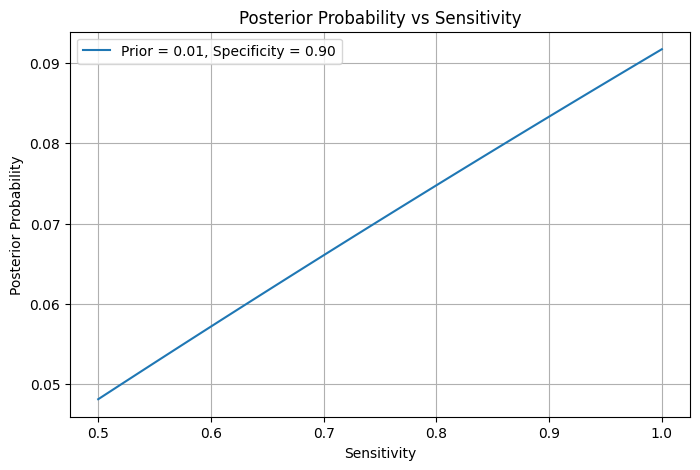

In [12]:
def plot_posterior_vs_sensitivity():
    sensitivities = np.linspace(0.5, 1.0, 100)
    posteriors = [posterior_probability(0.01, s, 0.90) for s in sensitivities]
    plt.figure(figsize=(8, 5))
    plt.plot(sensitivities, posteriors, label='Prior = 0.01, Specificity = 0.90')
    plt.xlabel('Sensitivity')
    plt.ylabel('Posterior Probability')
    plt.title('Posterior Probability vs Sensitivity')
    plt.legend()
    plt.grid()
    plt.show()

plot_posterior_vs_sensitivity()

The posterior probability (Y-axis) of actually having the disease given a positive test as a
function of the test’s specificity (X-axis), assuming fixed prior and sensitivity.

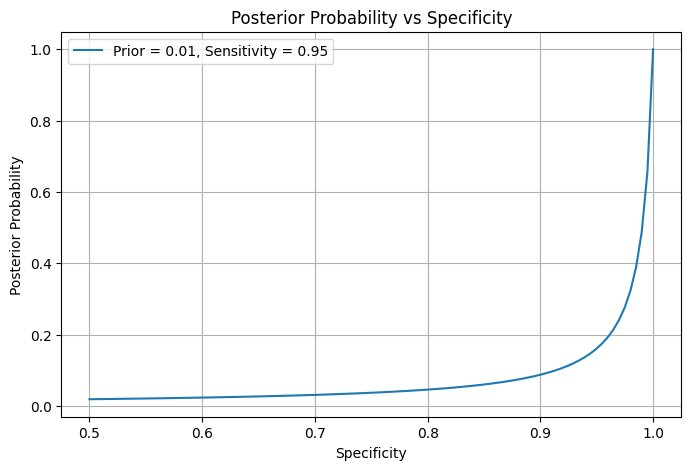

In [13]:
def plot_posterior_vs_specificity():
    specificities = np.linspace(0.5, 1.0, 100)
    posteriors = [posterior_probability(0.01, 0.95, s) for s in specificities]
    plt.figure(figsize=(8, 5))
    plt.plot(specificities, posteriors, label='Prior = 0.01, Sensitivity = 0.95')
    plt.xlabel('Specificity')
    plt.ylabel('Posterior Probability')
    plt.title('Posterior Probability vs Specificity')
    plt.legend()
    plt.grid()
    plt.show()

plot_posterior_vs_specificity()

Briefly discuss how the posterior changes as a function of each of the quantities.

### Student Answer
The posterior probability of actually having the disease given a positive test result depends on the prior probability, sensitivity, and specificity. As the prior probability (prevalence) increases, the chance that a positive test is a true positive also increases since the disease is more common in the population. Higher sensitivity improves the test’s ability to detect true positives, but if specificity is low, false positives can still be a problem. Specificity has the biggest impact on the posterior probability because reducing false positives makes a positive result much more reliable. If the disease is very rare, even a highly accurate test may still produce a lot of false positives, meaning additional testing is often needed to confirm a diagnosis.

Bonus (4 points): Generate three 3D plots (either surface plots or scatter plots) depicting the same posterior probability as a function of the combination of two quantities (prior - sensitivity, prior - specificity, sensitivity - specificity).

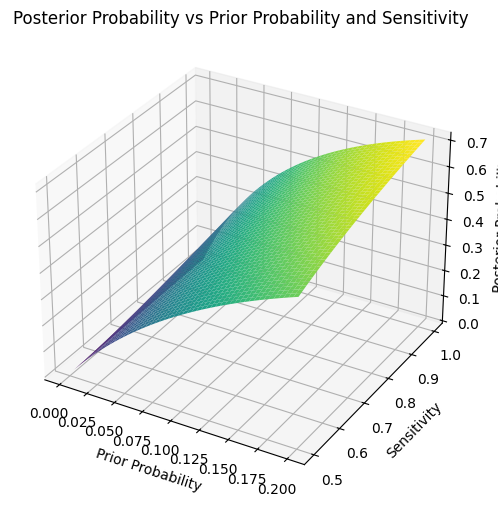

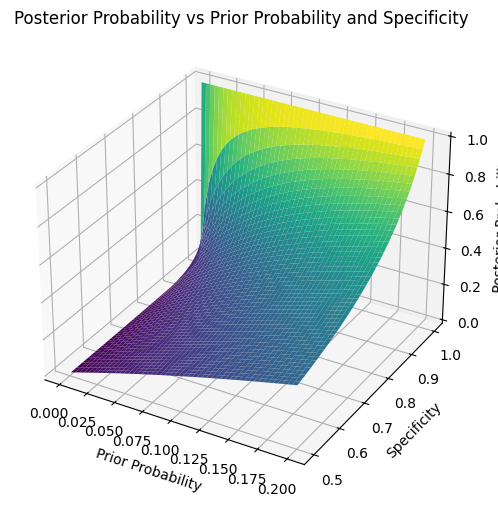

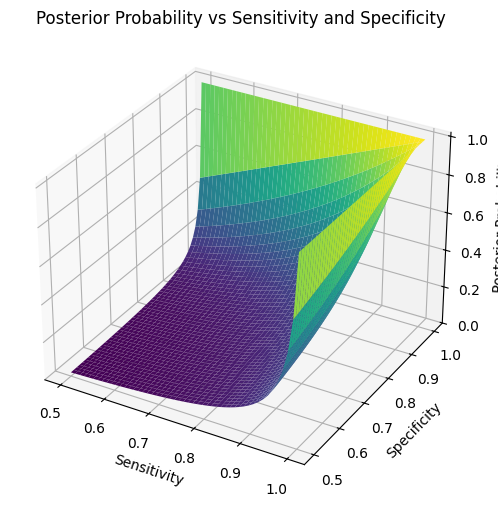

In [14]:
def plot_3d_posterior(x_range, y_range, x_label, y_label, fixed_param, fixed_value):
    X, Y = np.meshgrid(x_range, y_range)
    Z = np.array([[posterior_probability(prior, sensitivity, fixed_value) if fixed_param == 'specificity'
                   else posterior_probability(prior, fixed_value, sensitivity)
                   for prior, sensitivity in zip(x_row, y_row)] for x_row, y_row in zip(X, Y)])

    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, cmap='viridis')
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_zlabel('Posterior Probability')
    ax.set_title(f'Posterior Probability vs {x_label} and {y_label}')
    plt.show()

def generate_3d_plots():
    prior_range = np.linspace(0.001, 0.2, 50)
    sensitivity_range = np.linspace(0.5, 1.0, 50)
    specificity_range = np.linspace(0.5, 1.0, 50)

    plot_3d_posterior(prior_range, sensitivity_range, 'Prior Probability', 'Sensitivity', 'specificity', 0.90)
    plot_3d_posterior(prior_range, specificity_range, 'Prior Probability', 'Specificity', 'sensitivity', 0.95)
    plot_3d_posterior(sensitivity_range, specificity_range, 'Sensitivity', 'Specificity', 'prior', 0.01)

generate_3d_plots()